In [99]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('./netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Limpieza de Data y Columnas Adicionales

In [101]:
missing_percentages = (df.isnull().sum() / len(df)) * 100

print(missing_percentages)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


Vamos a imputar el país con la moda, y cast y director dejarle el valor en blanco

In [102]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].replace(np.nan, 'No Data')  
df['director'] = df['director'].replace(np.nan, 'No Data')

df.dropna(inplace=True)

In [103]:
print(df.isna().sum())
print(df.duplicated().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [105]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df_clean = df.copy()

## Visualizaciones y EDA

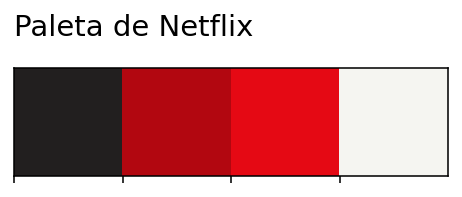

In [106]:
# Paleta de Netflix
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Paleta de Netflix",loc='left', fontsize=15,y=1.2)
plt.show()

In [107]:
x = df_clean['type'].value_counts()  
y = len(df_clean) 
r = (x / y).round(2)

mf_ratio = pd.DataFrame(r).T

mf_ratio

type,Movie,TV Show
count,0.7,0.3


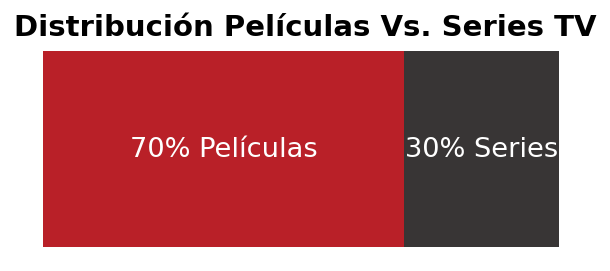

In [108]:
fig, ax = plt.subplots(figsize=(5, 2))

ax.barh(mf_ratio.index, mf_ratio['Movie'], color='#b20710', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], color='#221f1f', alpha=0.9)

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}% Películas", xy=(mf_ratio['Movie'][i]/2, i), va='center', ha='center', color='white', fontsize=14)
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}% Series", xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i), va='center', ha='center', color='white', fontsize=14)

fig.suptitle('Distribución Películas Vs. Series TV', fontsize=15, fontweight='bold')

ax.axis('off')
plt.show()

Ahora vamos a ver la distribución por países

In [109]:
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,September
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,November
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,January


In [110]:
## Como hay varios países, hay que agarrar el primero de la lista
df_clean['first_country'] = df_clean['country'].str.split(',').str[0]
df_clean['first_country'].replace('United States', 'USA', inplace=True)
df_clean['first_country'].replace('United Kingdom', 'UK', inplace=True)
df_clean['first_country'].replace('South Korea', 'S. Korea', inplace=True)

data_top_paises = df_clean['first_country'].value_counts().sort_values(ascending=False).head(10)
data_top_paises

first_country
USA          4031
India        1008
UK            627
Canada        271
Japan         257
France        212
S. Korea      211
Spain         181
Mexico        134
Australia     115
Name: count, dtype: int64

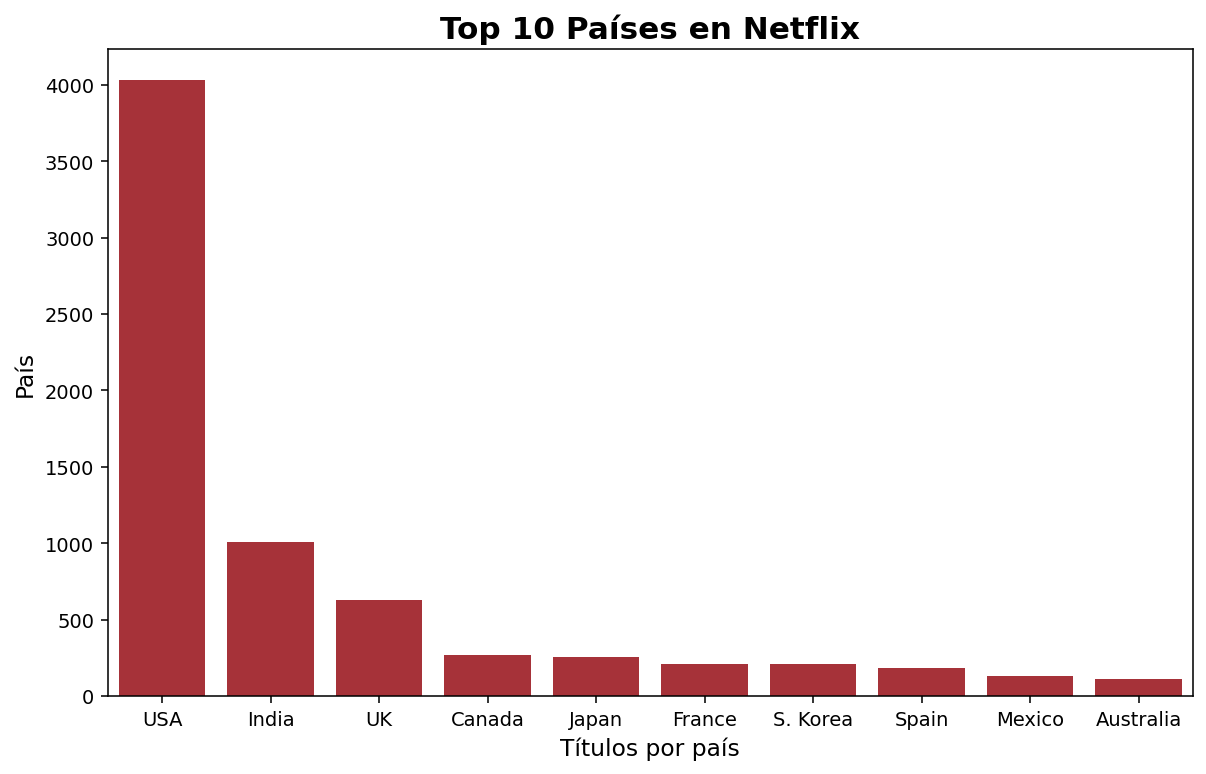

In [111]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data_top_paises.index, y=data_top_paises.values, palette=['#b20710'], alpha=0.9)

# Titles and labels
plt.title("Top 10 Países en Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Títulos por país", fontsize=12)
plt.ylabel("País", fontsize=12)

# Display plot
plt.show()

## Como es la distribución Películas vs TV Series

In [112]:
data_por_tipo = (
    df_clean[["type", "first_country"]]
    .groupby("first_country")["type"]
    .value_counts()
    .unstack()
    .loc[data_top_paises.index]
)
data_por_tipo.columns = ['Películas', 'Series TV']
data_por_tipo["sum"] = data_por_tipo.sum(axis=1)
data_por_tipo_ratio = (
    (data_por_tipo.T / data_por_tipo["sum"])
    .T[["Películas", "Series TV"]]
    .sort_values(by="Películas", ascending=False)[::-1]
)
data_por_tipo_ratio

,Películas,Series TV
first_country,,
S. Korea,0.222749,0.777251
Japan,0.330739,0.669261
Australia,0.530435,0.469565
UK,0.609250,0.390750
Mexico,0.641791,0.358209
Canada,0.690037,0.309963
USA,0.694617,0.305383
France,0.698113,0.301887
Spain,0.712707,0.287293


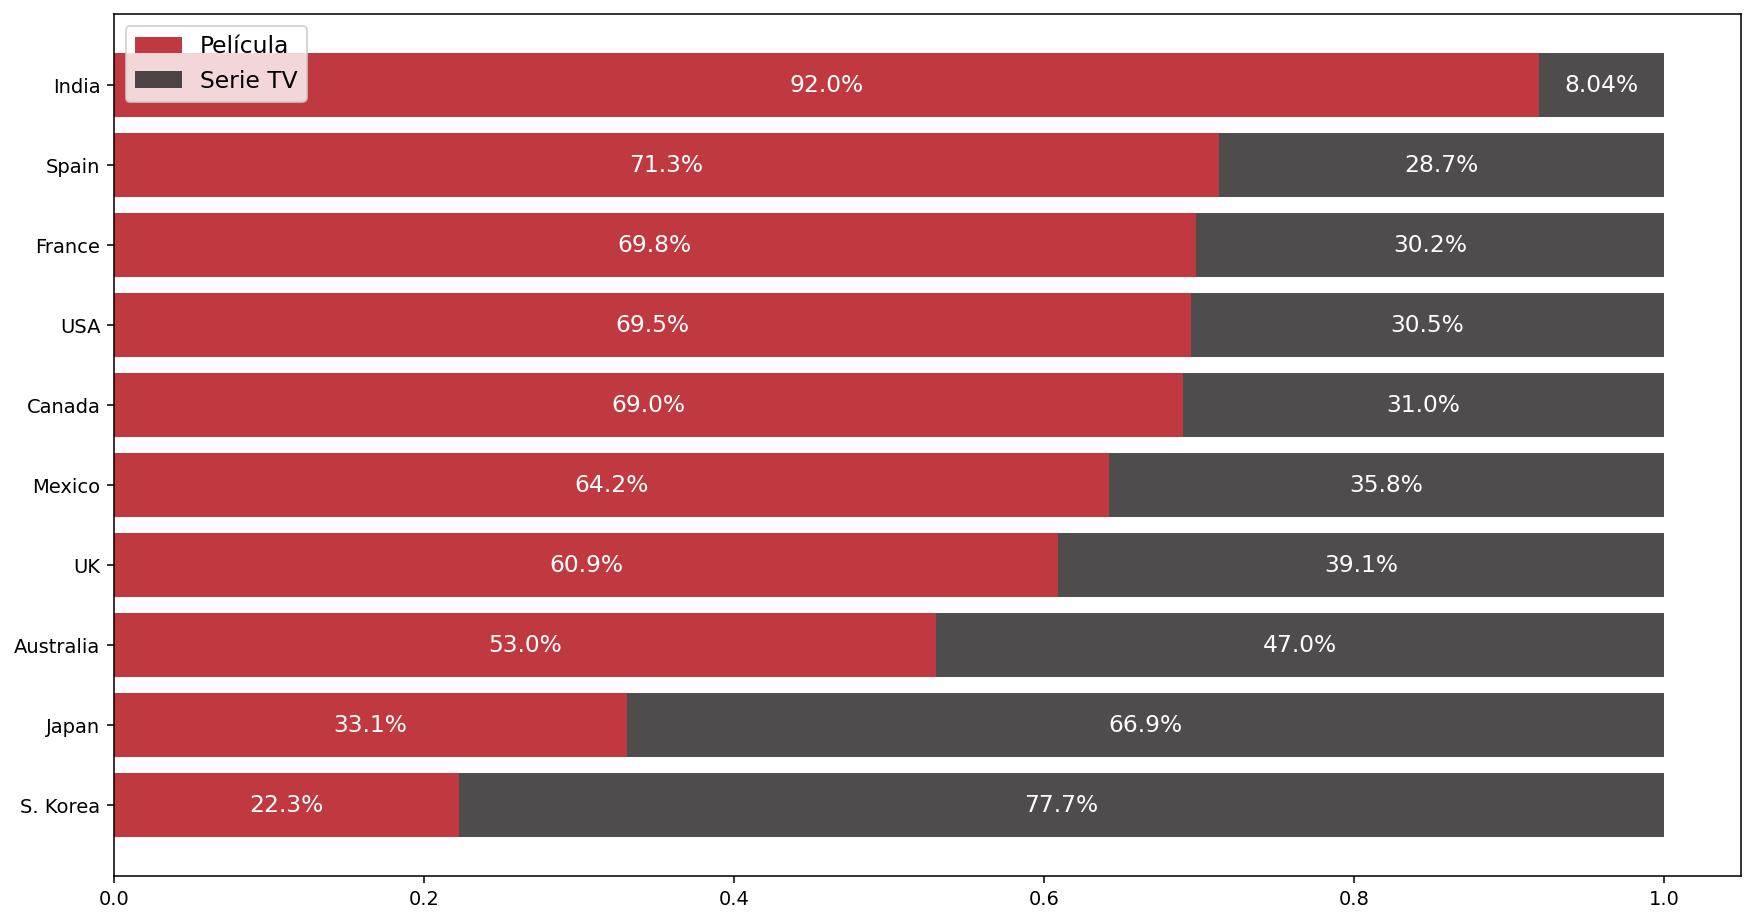

In [113]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(15, 8),
)

ax.barh(
    data_por_tipo_ratio.index,
    data_por_tipo_ratio["Películas"],
    color="#b20710",
    alpha=0.8,
    label="Película",
)
ax.barh(
    data_por_tipo_ratio.index,
    data_por_tipo_ratio["Series TV"],
    left=data_por_tipo_ratio["Películas"],
    color="#221f1f",
    alpha=0.8,
    label="Serie TV",
)
plt.legend(loc="upper left", fontsize=12)

for i in data_por_tipo_ratio.index:
    ax.annotate(
        f"{data_por_tipo_ratio['Películas'][i]*100:.3}%",
        xy=(data_por_tipo_ratio["Películas"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=12,
        fontweight="light",
        color="white",
    )

for i in data_por_tipo_ratio.index:
    ax.annotate(
        f"{data_por_tipo_ratio['Series TV'][i]*100:.3}%",
        xy=(data_por_tipo_ratio["Películas"][i] + data_por_tipo_ratio["Series TV"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=12,
        fontweight="light",
        color="white",
    )

Acá vemos el tipo de producción por país, donde vemos por ejemplo como India se especializa en el cine, y Corea del Sur tiene una gran producción de Series de TV.

In [114]:
grouped_rating = df_clean.groupby('rating').size().sort_values(ascending=False).reset_index(name='count')
rating_order = list(grouped_rating['rating'])
print(grouped_rating)

      rating  count
0      TV-MA   3205
1      TV-14   2157
2      TV-PG    861
3          R    799
4      PG-13    490
5      TV-Y7    333
6       TV-Y    306
7         PG    287
8       TV-G    220
9         NR     79
10         G     41
11  TV-Y7-FV      6
12     NC-17      3
13        UR      3


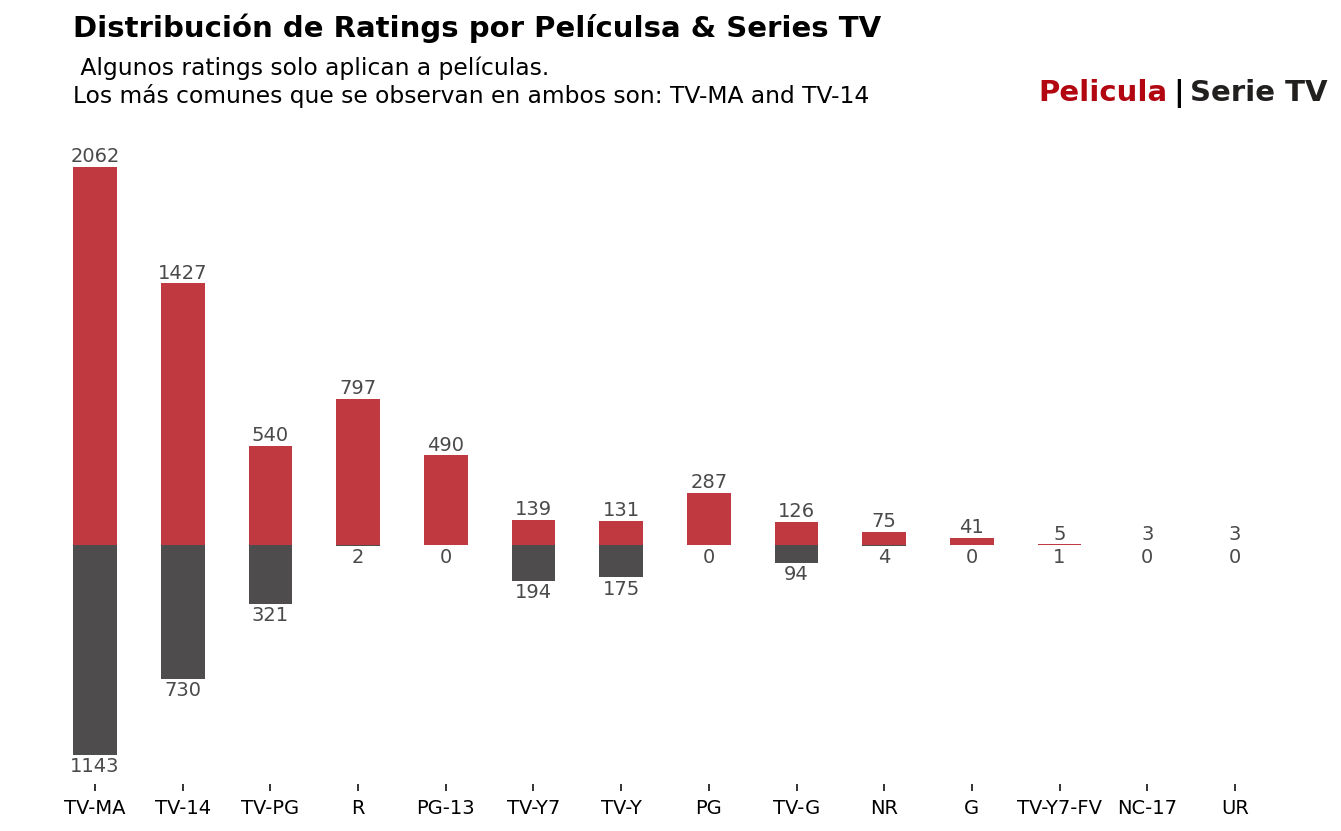

In [115]:
mf = (
    df_clean.groupby("type")["rating"]
    .value_counts()
    .unstack()
    .sort_index()
    .fillna(0)
    .astype(int)[rating_order]
)
movie = mf.loc["Movie"]
tv = - mf.loc["TV Show"]


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color="#b20710", alpha=0.8)
ax.bar(tv.index, tv, width=0.5, color="#221f1f", alpha=0.8)

for i in tv.index:
    ax.annotate(
        f"{-tv[i]}",
        xy=(i, tv[i] - 60),
        va="center",
        ha="center",
        fontweight="light",
        color="#4a4a4a",
    )

for i in movie.index:
    ax.annotate(
        f"{movie[i]}",
        xy=(i, movie[i] + 60),
        va="center",
        ha="center",
        fontweight="light",
        color="#4a4a4a",
    )


for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns)
ax.set_yticks([])

ax.legend().set_visible(False)
fig.text(
    0.16,
    1,
    "Distribución de Ratings por Películsa & Series TV",
    fontsize=15,
    fontweight="bold",
)
fig.text(
    0.16,
    0.89,
    """ Algunos ratings solo aplican a películas.
Los más comunes que se observan en ambos son: TV-MA and TV-14
""",
    fontsize=12,
    fontweight="light",
)


fig.text(0.735, 0.924, "Pelicula", fontweight="bold", fontsize=15, color="#b20710")
fig.text(0.815, 0.924, "|", fontweight="bold", fontsize=15, color="black")
fig.text(0.825, 0.924, "Serie TV", fontweight="bold", fontsize=15, color="#221f1f")

plt.show()

### Análisis en el tiempo

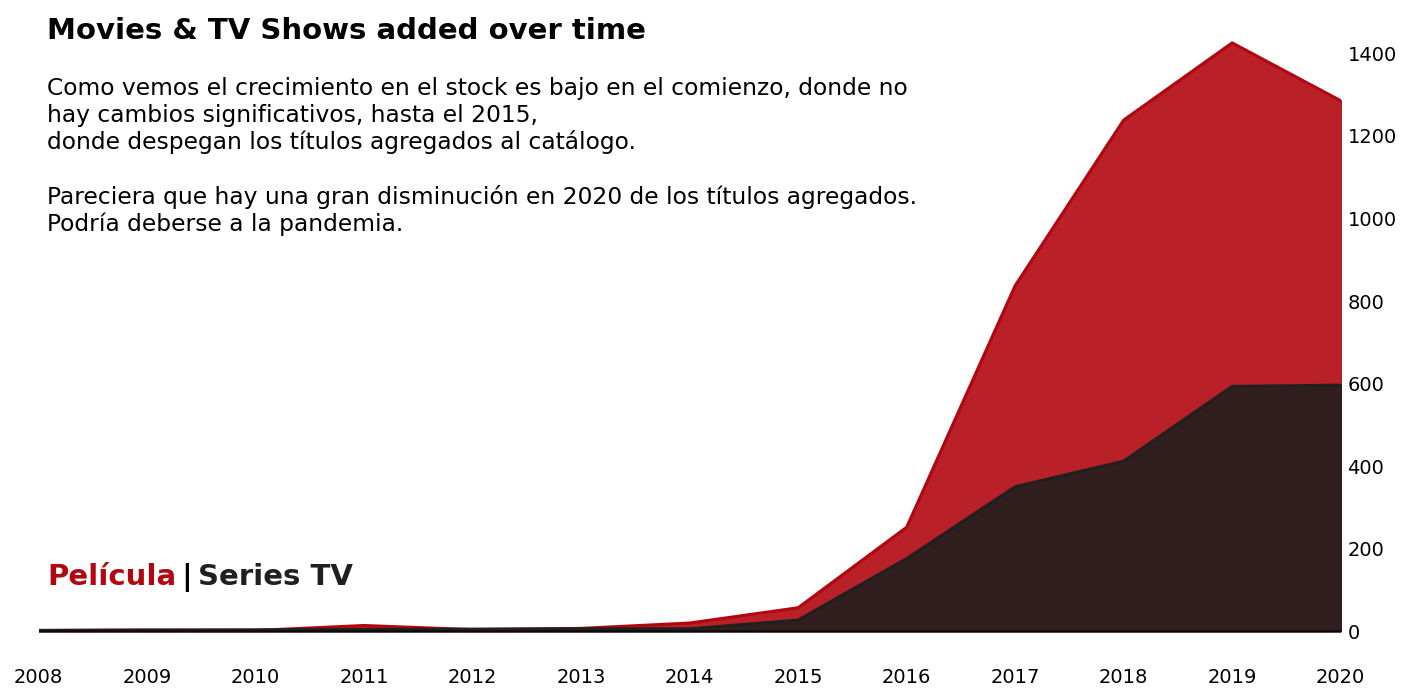

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df_clean["type"].value_counts().index):
    mtv_rel = df_clean[df_clean["type"] == mtv]["year_added"].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)

for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(
    0.13,
    0.85,
    "Movies & TV Shows added over time",
    fontsize=15,
    fontweight="bold",
)
fig.text(
    0.13,
    0.59,
    """Como vemos el crecimiento en el stock es bajo en el comienzo, donde no 
hay cambios significativos, hasta el 2015,
donde despegan los títulos agregados al catálogo.

Pareciera que hay una gran disminución en 2020 de los títulos agregados. 
Podría deberse a la pandemia.
""",
    fontsize=12,
    fontweight="light",
)


fig.text(
    0.13,
    0.2,
    "Película",
    fontweight="bold",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.21, 0.2, "|", fontweight="bold", fontsize=15, color="black"
)
fig.text(
    0.22,
    0.2,
    "Series TV",
    fontweight="bold",
    fontsize=15,
    color="#221f1f",
)
ax.tick_params(axis=u"both", which=u"both", length=0)

plt.show()

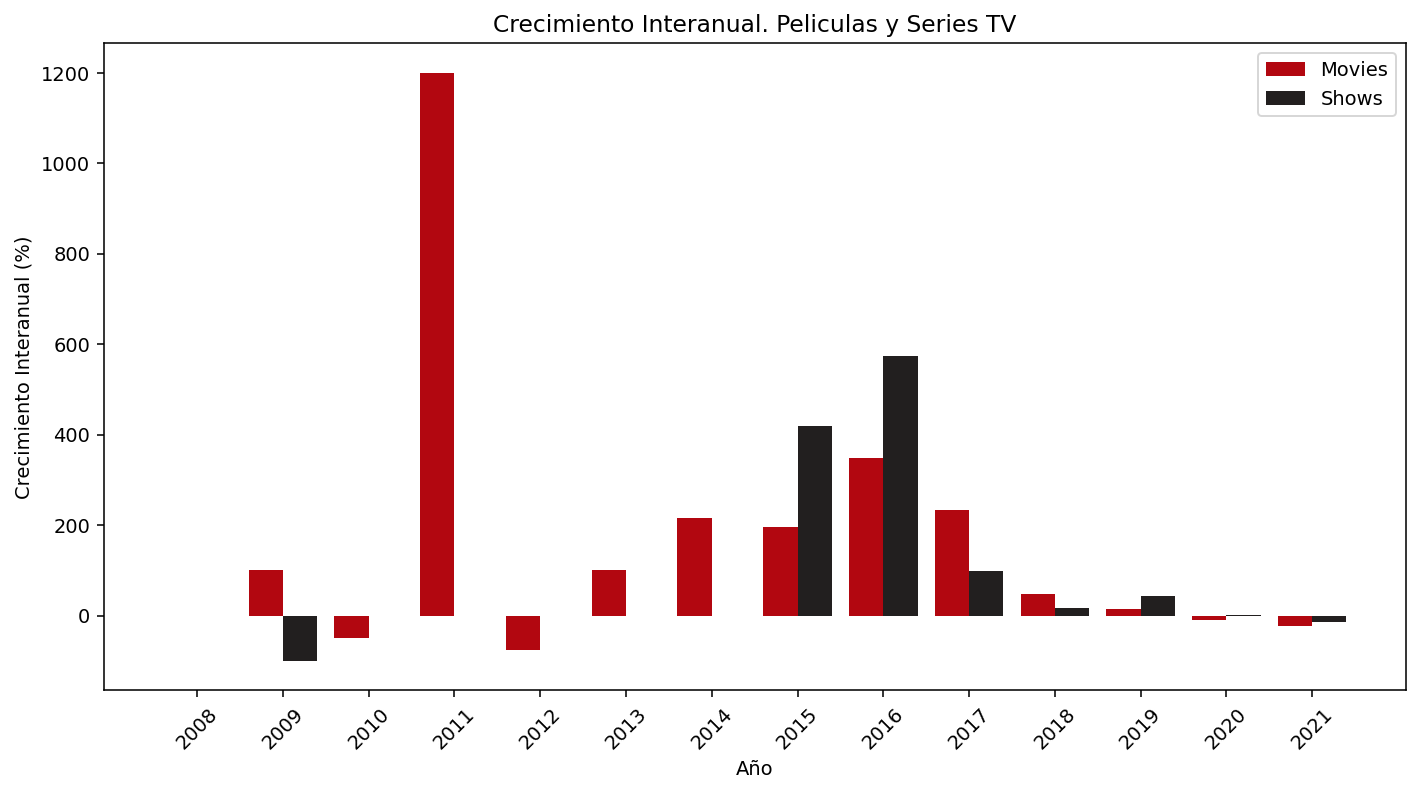

In [117]:
df_clean["year_added"] = pd.to_numeric(df_clean["year_added"], errors="coerce")

yearly_counts = df_clean.groupby(["year_added", "type"]).size().unstack()

yearly_counts = yearly_counts.fillna(0)

yearly_growth = yearly_counts.pct_change() * 100 
yearly_growth = yearly_growth.fillna(0)
yearly_growth = yearly_growth.dropna()

years = yearly_growth.index.astype(int) 
bar_width = 0.4
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - bar_width/2, yearly_growth.get("Movie", 0), width=bar_width, label="Movies", color="#b20710")
ax.bar(x + bar_width/2, yearly_growth.get("TV Show", 0), width=bar_width, label="Shows", color="#221f1f")

ax.set_xlabel("Año")
ax.set_ylabel("Crecimiento Interanual (%)")
ax.set_title("Crecimiento Interanual. Peliculas y Series TV")
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.legend()

plt.show()


Esto añade un poco de información a la dinámica de películas vs. Series de TV. Mientras que las películas tuvieron un crecimiento que data de antes, pero más constante, las Series mostraron un crecimiento más explosivo que recién arranca en el año 2015.

Con la pandemia, parece ser mayor el recorte sobre las películas. Una hipótesis podría ser por el mayor gasto presupuestario que estas conllevan, y la necesidad de mayor tiempo de rodado.

In [118]:
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

df_clean["month_name_added"] = pd.Categorical(
    df_clean["month_name_added"], categories=month_order, ordered=True
)

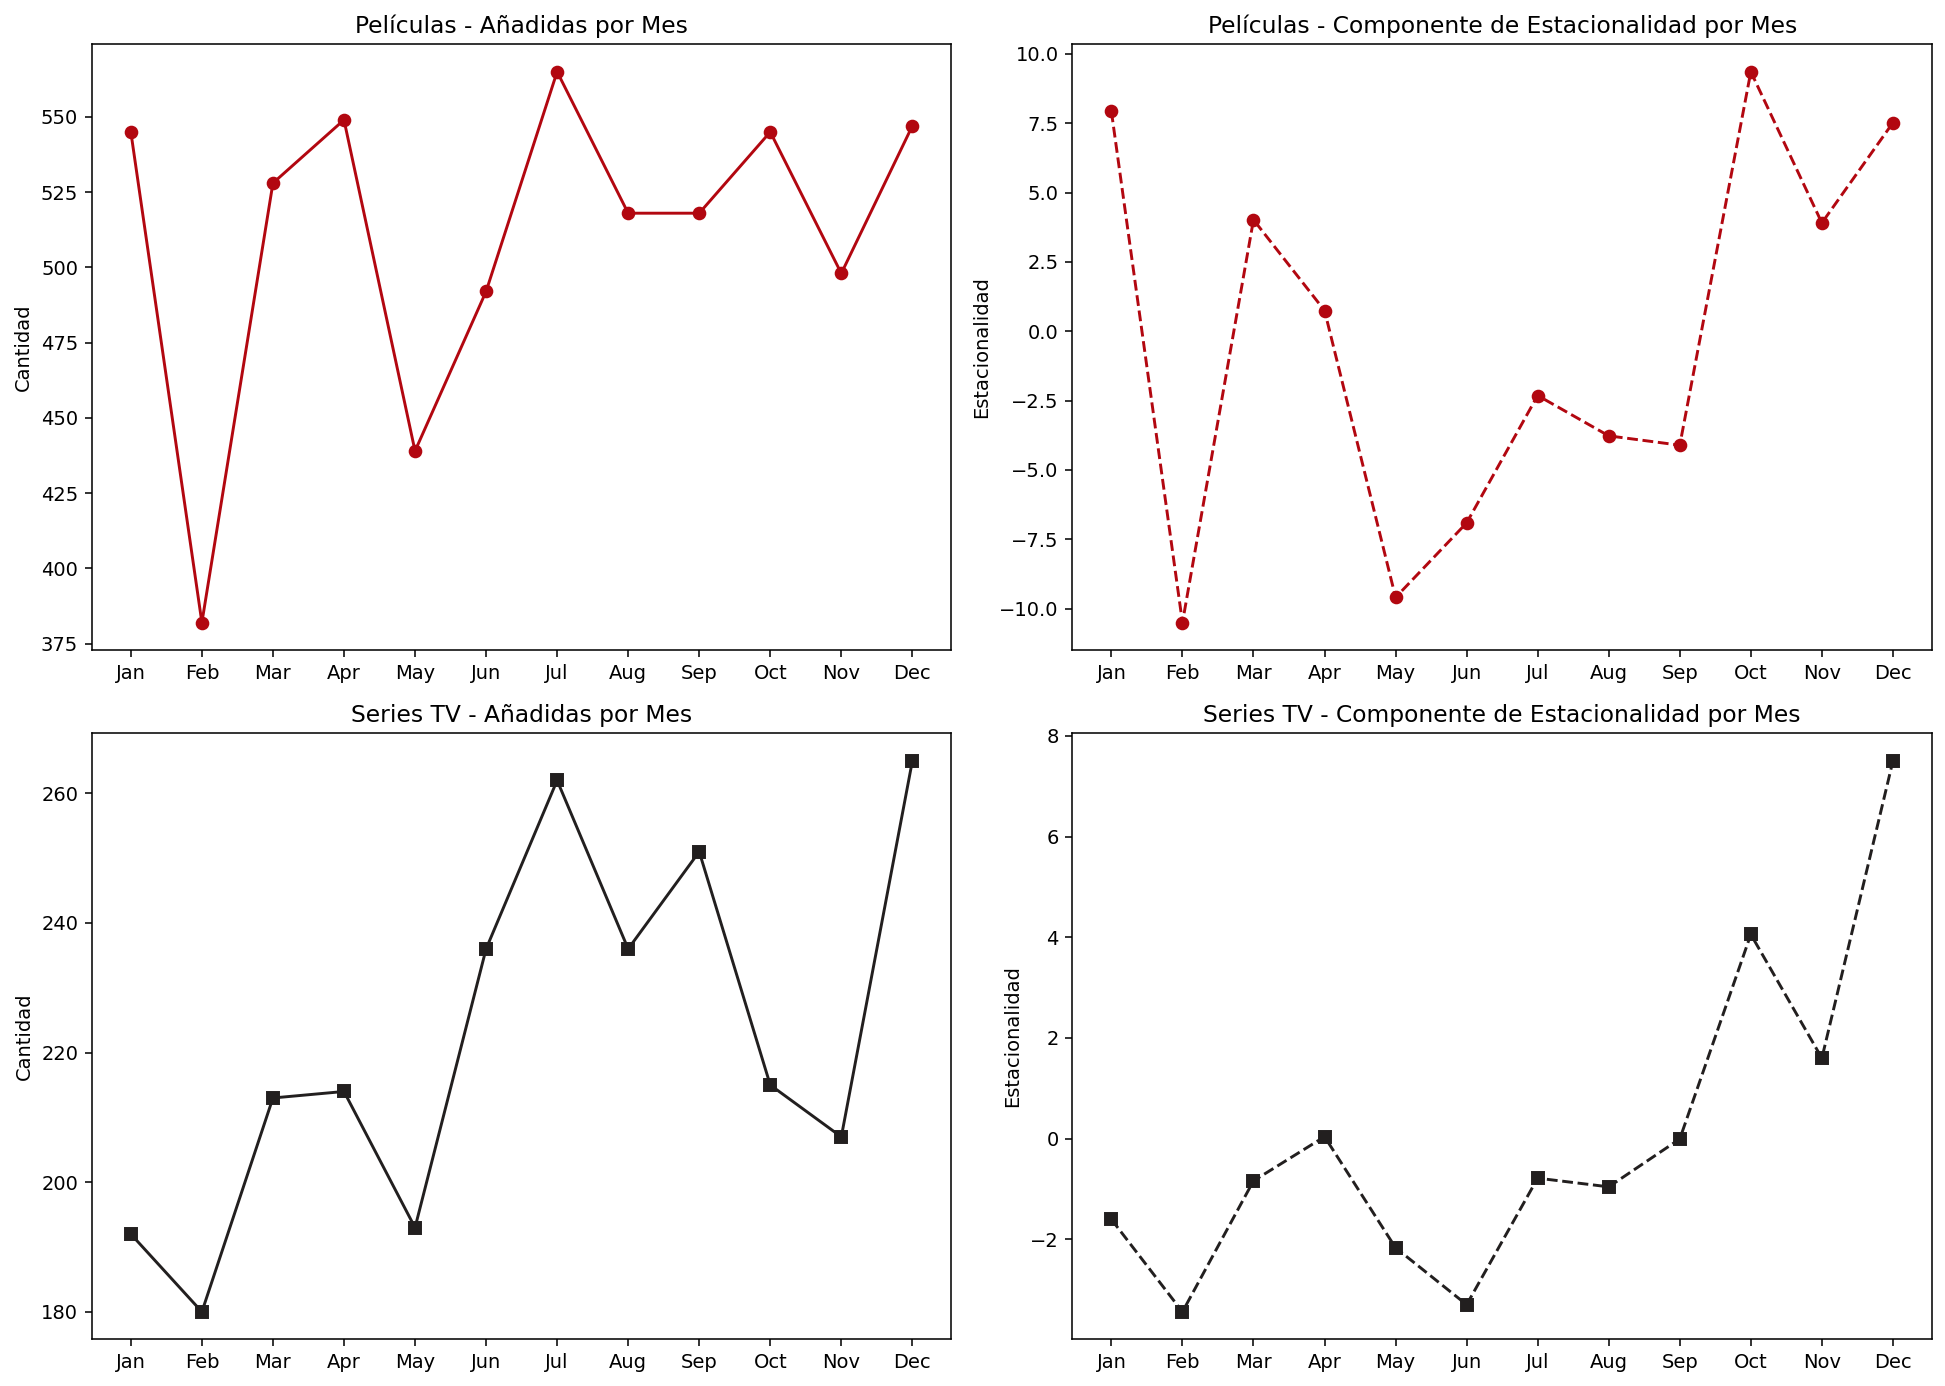

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

ordered_added_by_month = (
    df_clean.groupby(["month_name_added", "type"])["date_added"].count().unstack()
)

ts_movies = df[df["type"] == "Movie"].groupby(df["date_added"].dt.to_period("M")).size()
ts_movies.index = ts_movies.index.to_timestamp()

ts_tv = df[df["type"] == "TV Show"].groupby(df["date_added"].dt.to_period("M")).size()
ts_tv.index = ts_tv.index.to_timestamp()

decomp_movies = seasonal_decompose(ts_movies, model="additive", period=12)
decomp_tv = seasonal_decompose(ts_tv, model="additive", period=12)

trend_movies_avg = decomp_movies.trend.groupby(decomp_movies.trend.index.month).mean()

seasonal_movies_avg = decomp_movies.seasonal.groupby(
    decomp_movies.seasonal.index.month
).mean()

trend_tv_avg = decomp_tv.trend.groupby(decomp_tv.trend.index.month).mean()

seasonal_tv_avg = decomp_tv.seasonal.groupby(decomp_tv.seasonal.index.month).mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

months = range(1, 13)
month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

axes[0, 0].plot(months, ordered_added_by_month["Movie"], color='#b20710', marker="o", linestyle="-")
axes[0, 0].set_title("Películas - Añadidas por Mes")
axes[0, 0].set_xticks(months)
axes[0, 0].set_xticklabels(month_labels)
axes[0, 0].set_ylabel("Cantidad")

axes[0, 1].plot(months, seasonal_movies_avg, marker="o", linestyle="--", color="#b20710")
axes[0, 1].set_title("Películas - Componente de Estacionalidad por Mes")
axes[0, 1].set_xticks(months)
axes[0, 1].set_xticklabels(month_labels)
axes[0, 1].set_ylabel("Estacionalidad")

axes[1, 0].plot(months, ordered_added_by_month["TV Show"], marker="s", linestyle="-", color="#221f1f")
axes[1, 0].set_title("Series TV - Añadidas por Mes")
axes[1, 0].set_xticks(months)
axes[1, 0].set_xticklabels(month_labels)
axes[1, 0].set_ylabel("Cantidad")

axes[1, 1].plot(months, seasonal_tv_avg, marker="s", linestyle="--", color="#221f1f")
axes[1, 1].set_title("Series TV - Componente de Estacionalidad por Mes")
axes[1, 1].set_xticks(months)
axes[1, 1].set_xticklabels(month_labels)
axes[1, 1].set_ylabel("Estacionalidad")

plt.tight_layout()
plt.show()

En este gráfico se puede visualizar las películas añadidas por Mes, y además el componente estacional.

Las observaciones son más claras en el gráfico del componente estacional. Las películas y series de TV suelen ser añadidas en los meses de verano. Puede ser que por motivos de las vacaciones, que comparten los 2 hemisferios, se suelan lanzar más películas y Series.

El que presenta aún más estacionalidad son las películas, pudiendo ser este un formato que los consumidores eligen con mayor frecuencia en fiestas o vacaciones.

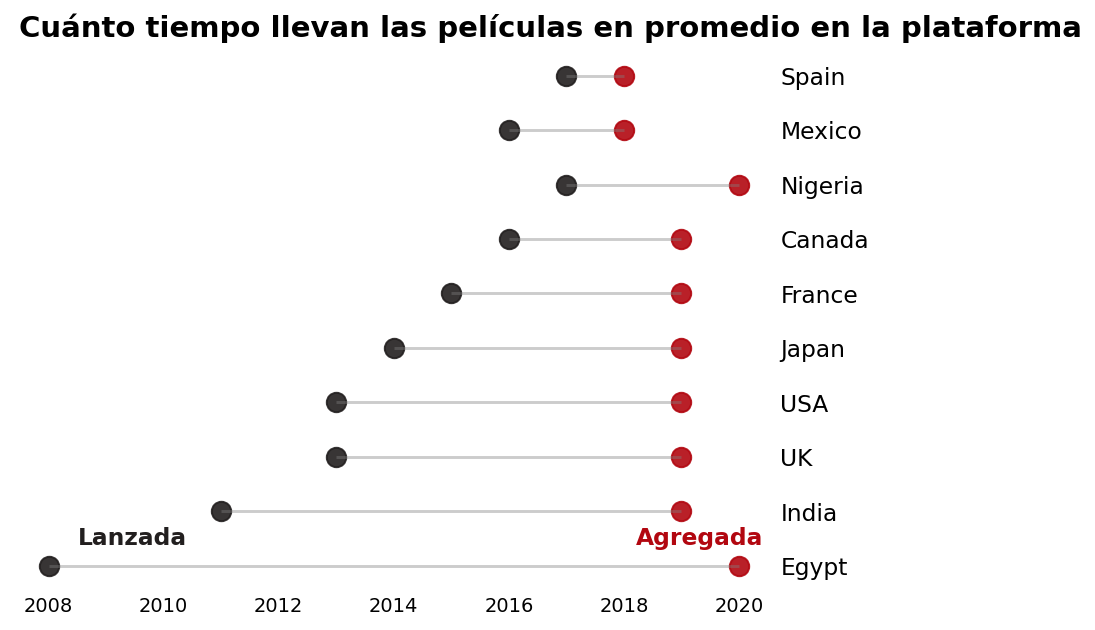

In [120]:
df_movies = df_clean[df_clean["type"] == "Movie"]

data = df_movies.groupby('first_country').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
data = data['first_country']

df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')[['release_year', 'year_added']].mean().round()

ordered_df = loli.sort_values(by='release_year', key=lambda x: (loli['year_added'] - loli['release_year']), ascending=False)
my_range = range(1,len(loli.index)+1)

my_range = range(1, len(loli.index) + 1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'Cuánto tiempo llevan las películas en promedio en la plataforma', fontsize=15, fontweight='bold')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f', s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710', s=100, alpha=0.9, label='Average added date')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis=u'both', which=u'both', length=0)
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontsize=12)

fig.text(0.19, 0.175, "Lanzada", fontweight="bold", fontsize=12, color='#221f1f')
fig.text(0.76, 0.175, "Agregada", fontweight="bold", fontsize=12, color='#b20710')

plt.show()

In [121]:
us_ind = (
    df_clean[
        (df_clean["first_country"] == "USA") | (df_clean["first_country"] == "India")
    ]
    .groupby("year_added") 
    ["first_country"]
    .value_counts()
    .unstack(fill_value=0)  
)
print(us_ind)

first_country  India  USA
year_added               
2008               0    2
2009               0    1
2010               0    1
2011               0   12
2012               0    3
2013               0   10
2014               0   19
2015               0   57
2016              11  196
2017             153  467
2018             339  621
2019             212  926
2020             193  818
2021             100  898


### Comparación de los top 2 países productores

Sabemos por nuestro análisis previo que los top 2 productores de contenido son Estados Unidos e India. En un análisis comparativo, se ve la clara diferencia entre ambos, donde Estados Unidos creció un 44800% desde el comienzo, y la India un 809.09%.

first_country        India      USA
year_added                         
2008              0.000000    100.0
2009              0.000000     50.0
2010              0.000000     50.0
2011              0.000000    600.0
2012              0.000000    150.0
2013              0.000000    500.0
2014              0.000000    950.0
2015              0.000000   2850.0
2016            100.000000   9800.0
2017           1390.909091  23350.0
2018           3081.818182  31050.0
2019           1927.272727  46300.0
2020           1754.545455  40900.0
2021            909.090909  44900.0


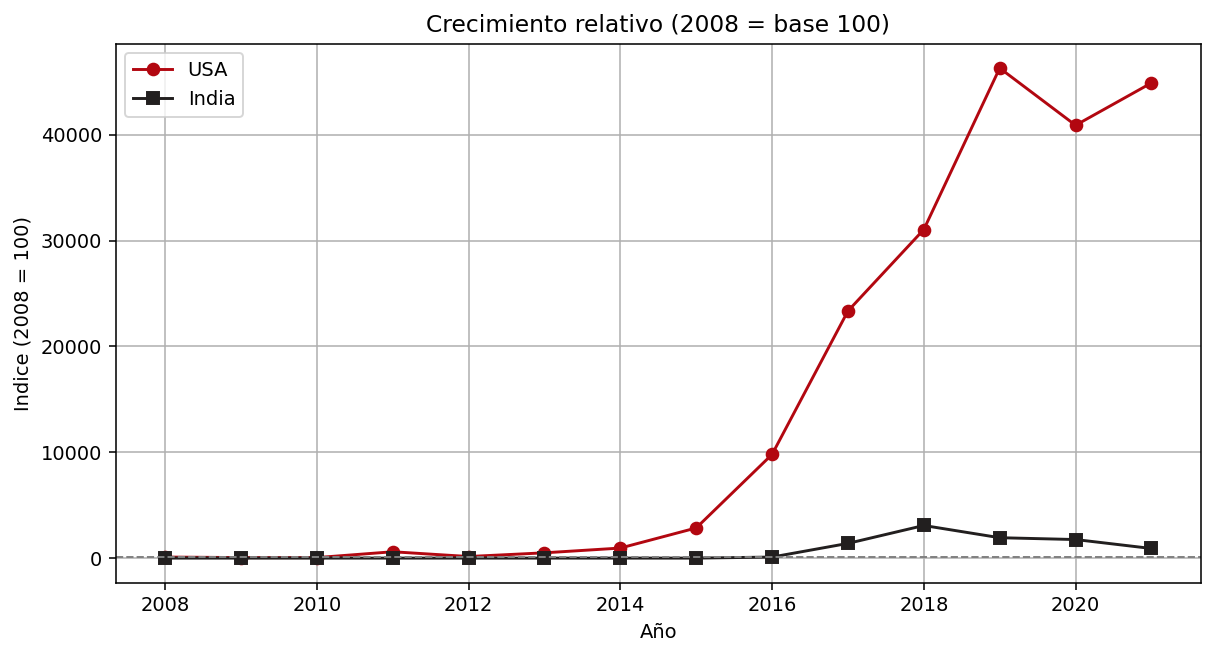

In [122]:
first_nonzero_values = us_ind.apply(lambda col: col[col != 0].iloc[0], axis=0)

data_normalized = us_ind / first_nonzero_values *100
print(data_normalized)
plt.figure(figsize=(10, 5))
plt.plot(data_normalized.index, data_normalized["USA"], color='#b20710', marker='o', label="USA")
plt.plot(data_normalized.index, data_normalized["India"],color='#221f1f', marker='s', label="India")
plt.axhline(100, color='gray', linestyle='--', linewidth=1) 


plt.title("Crecimiento relativo (2008 = base 100)")
plt.xlabel("Año")
plt.ylabel("Indice (2008 = 100)")

plt.legend()
plt.grid(True)
plt.show()

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=08f87cca-a907-455f-8741-b262ded89dbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>